In [18]:
import json
from typing import Optional, Union
def read_corpus(filename) -> Union[list, list]:
    """
    读取给定的语料库，并把问题列表和答案列表分别写入到qlist，alist中
    qlist = ['问题1'，'问题2'，...,'问题n']
    alist = ['答案1'，'答案2'，...,'答案n']
    务必要让每一个问题都对应一个答案（下标位置一致）
    """

    data = json.load(open(filename))

    qlist = []
    alist = []

    data = data['data'] #list

    for da in data:
        paragraphs = da['paragraphs'] #list
        for para in paragraphs:
            qas = para['qas'] #list
            for x in qas:
                if x['answers'] != []:
                    qlist.append(x['question'])
                    alist.append(x['answers'][0]['text'])
    assert len(qlist) == len(alist), '问题列表和答案列表长度不一致'
    return qlist, alist

In [19]:
qlist, alist = read_corpus('/Users/v_wangbo35/Desktop/cc/train-v2.0.json')
# qlist[555], alist[555]

In [20]:
#TODO: 统计一下在qlist总共出现了多少单词，以及出现了多少个不同的单词
#   这里虚高做简单的分词，对于英文根据空格来粉刺即可，其他过滤暂不考虑（只需分词）
import string
import re

#去标点符号，分册，得到词-词频的字典
def segmentWords(lst) -> Union[int, dict]:
    """
    :param lst: 待分词的文本列表,list传入
    :return: 返回词频总数，词-词频的字典
    """
    total = 0
    word_dict = {}
    for line in lst:
        pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
        sentence = pattern.sub('', line)
        words = sentence.split()
        for word in words:
            word_dict[word] = word_dict.get(word, 0) + 1
            total += 1
    return total, word_dict

In [21]:
qlist, alist = read_corpus('/Users/v_wangbo35/Desktop/cc/train-v2.0.json')
# qlist[555], alist[555]
word_total, q_dict = segmentWords(qlist)
total_diff_words = len(q_dict.keys())
print("总共{}个单词".format(word_total))
print("总共{}个不同的单词".format(total_diff_words))

总共873167个单词
总共45246个不同的单词


In [22]:
# TODO: 统计一下qlist中每个单词出现的频率，并把这些频率排一下序，然后画成plot. 比如总共出现了总共7个不同单词，而且每个单词出现的频率为 4, 5,10,2, 1, 1,1
#       把频率排序之后就可以得到(从大到小) 10, 5, 4, 2, 1, 1, 1. 然后把这7个数plot即可（从大到小）
#       需要使用matplotlib里的plot函数。y轴是词频
import matplotlib.pyplot as plt

word_sorted = sorted(q_dict.items(), key=lambda k:k[1], reverse = True) #按词频排序
word_freq = []
word_list = []
for line in word_sorted:
    word_list.append(line[0])
    word_freq.append(line[1])

print(word_freq[:100])
print(word_list[:100])
# x = range(total_diff_words)
# plt.plot(x, word_freq, 'ro')
# plt.ylabel("word frequency")
#plt.show()

# temp = [n for n in word_freq if n < 50]
# plt.plot(range(len(temp)), temp, color='r', linestyle='-', linewidth=2)
# plt.ylabel("word frequency")
# plt.show()

[61008, 37007, 33994, 21807, 18451, 17067, 16201, 15635, 13241, 10778, 8025, 8024, 7229, 7209, 5498, 5457, 5368, 4441, 4430, 4331, 4296, 4189, 4137, 4109, 3711, 3665, 3660, 3369, 3241, 3145, 3016, 2972, 2941, 2709, 2636, 2284, 2276, 2165, 2119, 2103, 1924, 1703, 1644, 1561, 1485, 1476, 1420, 1337, 1310, 1301, 1294, 1291, 1283, 1264, 1250, 1248, 1227, 1224, 1191, 1183, 1166, 1158, 1095, 1081, 1062, 1042, 1015, 1008, 982, 974, 930, 921, 919, 913, 911, 910, 895, 883, 876, 872, 855, 847, 840, 824, 819, 810, 808, 805, 787, 778, 775, 760, 744, 722, 717, 713, 702, 690, 683, 660]
['the', 'What', 'of', 'in', 'to', 'was', 'is', 'did', 'what', 'a', 'How', 'Who', 'and', 'for', 'many', 'are', 'When', 'that', 'were', 'does', 'In', 'on', 'with', 'Which', 'from', 'by', 'as', 'year', 'Where', 'The', 'be', 'have', 'do', 'first', 'name', 'which', 'an', 'at', 'type', 'used', 'has', 'most', 'can', 'people', 'their', 'other', 'how', 'his', 'it', 'called', 'two', 'when', 'its', 'during', 'one', 'much', 'afte

In [23]:
# TODO: 在qlist和alist里出现次数最多的TOP 10单词分别是什么？
a_total, a_dic = segmentWords(alist)
word_sorted = sorted(a_dic.items(), key=lambda k:k[1], reverse = True) #按词频排序
print(word_sorted[:10])
word_freq2 = []
word_list2 = []
for line in word_sorted:
    word_list2.append(line[0])
    word_freq2.append(line[1])
print("top 10 word of qlist are: ", word_list[:10])
print("top 10 word of alist are: ", word_list2[:10])

[('the', 13276), ('of', 8902), ('and', 8187), ('to', 3460), ('a', 3321), ('in', 2873), ('The', 1796), ('or', 1289), ('for', 1043), ('million', 869)]
top 10 word of qlist are:  ['the', 'What', 'of', 'in', 'to', 'was', 'is', 'did', 'what', 'a']
top 10 word of alist are:  ['the', 'of', 'and', 'to', 'a', 'in', 'The', 'or', 'for', 'million']


In [24]:
# TODO: 对于qlist, alist做文本预处理操作。 可以考虑以下几种操作：
#       1. 停用词过滤 （去网上搜一下 "english stop words list"，会出现很多包含停用词库的网页）   
#       2. 转换成lower_case： 这是一个基本的操作   
#       3. 去掉一些无用的符号： 比如连续的感叹号！！！， 或者一些奇怪的单词。
#       4. 去掉出现频率很低的词：比如出现次数少于10,20....
#       5. 对于数字的处理： 分词完只有有些单词可能就是数字比如44，415，把所有这些数字都看成是一个单词，这个新的单词我们可以定义为 "#number"
#       6. stemming（利用porter stemming): 因为是英文，所以stemming也是可以做的工作
#       7. 其他（如果有的话）
#       请注意，不一定要按照上面的顺序来处理，具体处理的顺序思考一下，然后选择一个合理的顺序

import nltk
from typing import Union
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))

# 预处理：去标点符号，去停用词，stemming,将数字转换为'#number'表示
def preprocessing(lst) -> Union[dict, list]:
    """
    :param lst: 待预处理文本列表，list传入
    :return: 返回预处理后的文本字典，列表
    """
    new_lst = []
    word_dic = {}
    for line in lst:
        pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
        sentence = pattern.sub('', line)
        sentence = sentence.lower()
        words = sentence.split()
        temp = []
        for word in words:
            if word not in stopwords:
                word = "#number" if word.isdigit() else word
                w = stemmer.stem(word)
                word_dic[w] = word_dic.get(w, 0) + 1
                temp.append(w)
        new_lst.append(temp)
    return word_dic, new_lst

#画出100分为类的词频统计图
def drawgraph(dic, name) -> None:
    """
    :param dic: 词频字典
    :param name: 文件名
    :return: 画出的统计图
    """
    freq = list(dic.values())
    freq.sort(reverse=True)
    temp = [n for n in freq if n <= 50]
    plt.plot(range(len(temp)), temp, 'r-')
    plt.ylabel(name)
    plt.show()

#过滤掉词频低于2，大于10000的词
def filterword(dic, lst, bottom, top) -> list:
    temp = []
    for k, v in dic.items():
        if v >= bottom and v <= top:
            temp.append(k)
    new_lst = []
    for line in lst:
        words = [w for w in line if w in temp]
        new_lst.append(' '.join(words))

    return new_lst

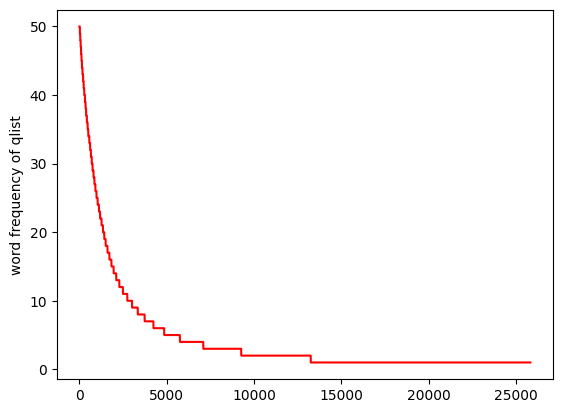

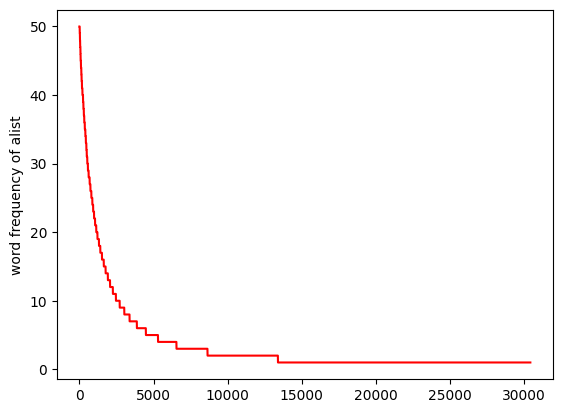

the length of new qlist is  86821
the length of new alist is  86821


In [25]:
q_dict,q_list = preprocessing(qlist)
drawgraph(q_dict,"word frequency of qlist")
 
a_dict,a_list = preprocessing(alist)
drawgraph(a_dict, "word frequency of alist")
 
new_qlist = filterword(q_dict, q_list, 2, 10000)
new_alist = filterword(a_dict, a_list, 2, 10000)
print("the length of new qlist is ",len(new_qlist))
print("the length of new alist is ",len(new_alist))

In [26]:
#文本表示
# TODO: 把qlist中的每一个问题字符串转换成tf-idf向量, 转换之后的结果存储在X矩阵里。 X的大小是： N* D的矩阵。 这里N是问题的个数（样本个数），
#       D是字典库的大小。 

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()  # 初始化一个tf-idf向量转换器vectorizer

X = vectorizer.fit_transform(new_qlist)  # 转换, 得到X矩阵

#TODO: 矩阵X有什么特点？ 计算一下它的稀疏度
x_mat = X.toarray()
n = len(x_mat)
m = len(x_mat[0])
t = 0
for i in range(n):
    for j in range(m):
        if x_mat[i][j] != 0:
            t += 1
sparsity = t / (n * m)
print(sparsity)

0.00034930747261915386


In [27]:
#对于用户的输入问题，找到相似度最高的TOP5的问题，并把5个潜在的答案返回
from sklearn.metrics.pairwise import cosine_similarity
 
def top5results(input_q):
    """
    给定用户输入的问题 input_q, 返回最有可能的TOP 5问题。这里面需要做到以下几点：
    1. 对于用户的输入 input_q 首先做一系列的预处理，然后再转换成tf-idf向量（利用上面的vectorizer)
    2. 计算跟每个库里的问题之间的相似度
    3. 找出相似度最高的top5问题的答案
    """
    # 问题预处理
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    sentence = pattern.sub("", input_q)
    sentence = sentence.lower()
    words = sentence.split()
    result = []
    for word in words:
        if word not in stopwords:
            word = "#number" if word.isdigit() else word
            w = stemmer.stem(word)
            result.append(w)
    
    #计算相似度
    input_seg = ' '.join(result)
    input_vec = vectorizer.transform([input_seg])
    res = cosine_similarity(input_vec, X)[0]
    
    #得到top 5的索引
    score_idx = dict((i,v) for i,v in enumerate(res))
    score_sorted = sorted(score_idx.items(), key=lambda k:k[1],reverse=True)
    idx = [idx[0] for idx in score_sorted]
    top_idxs = idx[:5]  # top_idxs存放相似度最高的（存在qlist里的）问题的下表 
    print(top_idxs)
    
    result = [alist[i] for i in top_idxs]
    return result  # 返回相似度最高的问题对应的答案，作为TOP5答案  

In [28]:
# TODO: 编写几个测试用例，并输出结果
print (top5results("when did Beyonce start becoming popular"))
print (top5results("what languge does the word of 'symbiosis' come from"))
 
"""
结果：
[0, 39267, 60835, 23136, 62423]
['in the late 1990s', 'Particularly since the 1950s, pro wrestling events have frequently been responsible for sellout crowds at large arenas', 'mandolin-based guitar programs', 'early DJs creating music in their own homes', 'Iwasaki Yatarō']
[7786, 27470, 41967, 7844, 8154]
['Greek', '1570s', 'living together', 'the evolution of all eukaryotes', 'Persian and Sanskrit']
"""

[0, 39267, 60835, 23136, 62423]
['in the late 1990s', 'Particularly since the 1950s, pro wrestling events have frequently been responsible for sellout crowds at large arenas', 'mandolin-based guitar programs', 'early DJs creating music in their own homes', 'Iwasaki Yatarō']
[7786, 27470, 41967, 7844, 8154]
['Greek', '1570s', 'living together', 'the evolution of all eukaryotes', 'Persian and Sanskrit']


"\n结果：\n[0, 39267, 60835, 23136, 62423]\n['in the late 1990s', 'Particularly since the 1950s, pro wrestling events have frequently been responsible for sellout crowds at large arenas', 'mandolin-based guitar programs', 'early DJs creating music in their own homes', 'Iwasaki Yatarō']\n[7786, 27470, 41967, 7844, 8154]\n['Greek', '1570s', 'living together', 'the evolution of all eukaryotes', 'Persian and Sanskrit']\n"

In [29]:
# TODO: 基于倒排表的优化。在这里，我们可以定义一个类似于hash_map, 比如 inverted_index = {}， 然后存放包含每一个关键词的文档出现在了什么位置，
#       也就是，通过关键词的搜索首先来判断包含这些关键词的文档（比如出现至少一个），然后对于candidates问题做相似度比较。
# 
from functools import reduce
 
inverted_idx = {}  # 定一个一个简单的倒排表
for i in range(len(new_qlist)):
    for word in new_qlist[i].split():
        if word not in inverted_idx:
            inverted_idx[word] = [i]
        else:
            inverted_idx[word].append(i)
for k in inverted_idx:
    inverted_idx[k] = sorted(inverted_idx[k])
 
# 求两个set的交集
def intersections(set1, set2):
    return set1.intersection(set2)
 
def top5results_invidx(input_q):
    """
    给定用户输入的问题 input_q, 返回最有可能的TOP 5问题。这里面需要做到以下几点：
    1. 利用倒排表来筛选 candidate
    2. 对于用户的输入 input_q 首先做一系列的预处理，然后再转换成tf-idf向量（利用上面的vectorizer)
    3. 计算跟每个库里的问题之间的相似度
    4. 找出相似度最高的top5问题的答案
    """
    # 问题预处理
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    sentence = pattern.sub("", input_q)
    sentence = sentence.lower()
    words = sentence.split()
    result = []
    for word in words:
        if word not in stopwords:
            word = "#number" if word.isdigit() else word
            w = stemmer.stem(word)
            result.append(w)
    
    # 根据倒排表筛选出候选问题索引
    candidates = []
    for word in result:
        if word in inverted_idx:
            ids = inverted_idx[word]
            candidates.append(set(ids))
    candidate_idx = list(reduce(intersections, candidates))  # 候选问题索引
    #print(candidate_idx)
    
    input_seg = ' '.join(result)
    input_vec = vectorizer.transform([input_seg])
    
    # 与每个候选问题计算相似度
    res = []
    for i in candidate_idx:
        score = cosine_similarity(input_vec,X[i])[0]
        res.append((i,score[0]))
    res_sorted = sorted(res,key=lambda k:k[1],reverse=True)
    #print(res_sorted)
    
    # 根据索引检索top 5答案
    answers = []
    i = 0
    for (idx,score) in res_sorted:
        if i < 5:
            answer = alist[idx]
            answers.append(answer)
        i += 1
    
    return answers

In [30]:
# TODO: 编写几个测试用例，并输出结果
print (top5results_invidx("when did Beyonce start becoming popular"))
print (top5results_invidx("what languge does the word of 'symbiosis' come from"))
 
"""
结果：
['in the late 1990s']
['Greek']
"""

['in the late 1990s']
['Greek']


"\n结果：\n['in the late 1990s']\n['Greek']\n"

In [32]:
#加载glove词向量
def loadGlove(path):
    vocab = {}
    embedding = []
    vocab["UNK"] = 0
    embedding.append([0]*100)
    file = open(path, 'r', encoding='utf8')
    i = 1
    for line in file:
        row = line.strip().split()
        vocab[row[0]] = i
        embedding.append(row[1:])
        i += 1
    print("Finish load Glove")
    file.close()
    return vocab, embedding
 
# 转换为词向量
def word_to_vec(words, vocab, emb):
    vec = []
    
    for word in words:
        if word in vocab:
            idx = vocab[word]
            vec.append(emb[idx])
        else:
            idx = 0
            vec.append(emb[idx])
    return vec
 
path = '/Users/v_wangbo35/Desktop/cc/glove.6B.100d.txt'
# TODO
vocabs,emb = loadGlove(path)# 读取每一个单词的嵌入。这个是 D*H的矩阵，这里的D是词典库的大小， H是词向量的大小。 这里面我们给定的每个单词的词向量，那句子向量怎么表达？
      # 其中，最简单的方式 句子向量 = 词向量的平均（出现在问句里的）， 如果给定的词没有出现在词典库里，则忽略掉这个词。
 
def top5results_emb(input_q):
    """
    给定用户输入的问题 input_q, 返回最有可能的TOP 5问题。这里面需要做到以下几点：
    1. 利用倒排表来筛选 candidate
    2. 对于用户的输入 input_q，转换成句子向量
    3. 计算跟每个库里的问题之间的相似度
    4. 找出相似度最高的top5问题的答案
    """
    # 问题预处理
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    sentence = pattern.sub("", input_q)
    sentence = sentence.lower()
    words = sentence.split()
    result = []
    for word in words:
        if word not in stopwords:
            word = "#number" if word.isdigit() else word
            w = stemmer.stem(word)
            result.append(w)
    # 输入问题的词向量
    input_q_vec = word_to_vec(result, vocabs,emb)
    
    # 根据倒排表筛选出候选问题索引
    candidates = []
    for word in result:
        if word in inverted_idx:
            ids = inverted_idx[word]
            candidates.append(set(ids))
    candidate_idx = list(reduce(intersections, candidates))  # 候选问题索引
    
    # 计算相似度得分
    scores = []
    for i in candidate_idx:
        sentence = new_qlist[i].split()
        vec = word_to_vec(sentence, vocabs, emb)
        score = cosine_similarity(input_q_vec, vec)[0]
        scores.append((i, score[0]))
    scores_sorted = sorted(scores, key=lambda k:k[1], reverse=True)
    
    # 根据索引检索top 5答案
    answers = []
    i = 0
    for (idx,score) in scores_sorted:
        if i < 5:
            answer = alist[idx]
            answers.append(answer)
        i += 1
    
    return answers

Finish load Glove


In [33]:
# TODO: 编写几个测试用例，并输出结果
print (top5results_emb("when did Beyonce start becoming popular"))
print (top5results_emb("what languge does the word of 'symbiosis' come from"))
 
"""
结果：
['in the late 1990s']
['cross', 'the name of a pre-Islamic (before the seventh century A.D.) tribe', 'of Arabic origin', 'slahta', 'Gothia']
"""

['in the late 1990s']
['Greek']


"\n结果：\n['in the late 1990s']\n['cross', 'the name of a pre-Islamic (before the seventh century A.D.) tribe', 'of Arabic origin', 'slahta', 'Gothia']\n"